<a href="https://colab.research.google.com/github/ibonetc/AI_Deep-Learning/blob/main/IA_DL_AugmentationData_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo usando Keras con la base de datos de perros y gatos

Enlace de datos:
[Descargue la base de datos aquí](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Cargar los datos

In [ ]:
!unzip "/content/drive/My Drive/Gatos_Perros.zip"

Archive:  /content/drive/My Drive/Gatos_Perros.zip
  inflating: train.zip               
  inflating: sample_submission.csv   
  inflating: test.zip                


In [ ]:
!unzip "/content/test.zip"
!unzip "/content/train.zip"

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520

In [ ]:
PATH="/content"

In [ ]:
fnames_train = np.array([f'{PATH}/train/{f}' for f in (os.listdir(f'{PATH}/train'))])
labels_train = np.array([(0 if 'cat' in fname else 1) for fname in fnames_train])

Tomando la primera imagen

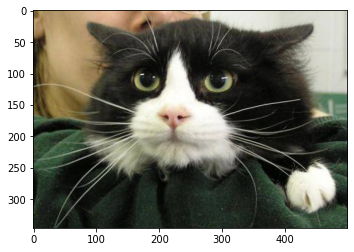

In [ ]:
image = np.expand_dims(plt.imread(fnames_train[10]),0)
plt.imshow(image[0])

## Aumentar los datos
Aumentar los datos es una forma de incrementar los datos, con imágenes creadas a partir de las imagenes que ya tenemos con pequeñas variaciones.

Tenemos una clase ***ImageDataGenerator*** que se utiliza para generar lotes de datos de imagen tensoriales con aumento de datos en tiempo real. Los datos se colocarán en bucle (en lotes) de forma indefinida. Los datos de imagen se generan transformando las imágenes de entrenamiento reales por rotación, recorte, desplazamiento, corte, zoom, giro, reflexión, normalización, etc.

Algunas de las propiedades más usadas para aumentar los datos:

### Estandarización a partir de una media
*   Feature-wise standardization: Estandarizar los valores de los píxeles.
Esto se puede hacer mediante los argumentos  **featurewise_center** and **featurewise_std_normalization**

**Ejemplo**: Estandarizar las imágenes con media 0 y desviación estándar 1



In [ ]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [ ]:
aug_iter=datagen.flow(image)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


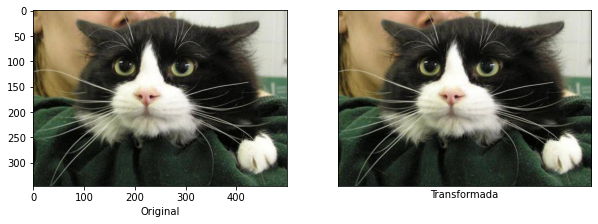

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(image[0])
plt.xlabel('Original')
plt.subplot(1,2,2)
plt.imshow(next(aug_iter)[0].astype(np.uint8))
plt.xlabel('Transformada')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()



*   **ZCA Whitening**: Una transformación de blanqueamiento de una imagen es una operación de álgebra lineal que reduce la redundancia en la matriz de imágenes de píxeles. ZCA es una técnica que, a diferencia de PCA, mantiene las dimensiones orginales.

Menos redundancia en la imagen tiene como objetivo resaltar mejor las estructuras y características de la imagen para el algoritmo de aprendizaje.



In [ ]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [ ]:
datagen = ImageDataGenerator(zca_whitening=True)
aug_iter=datagen.flow(image)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


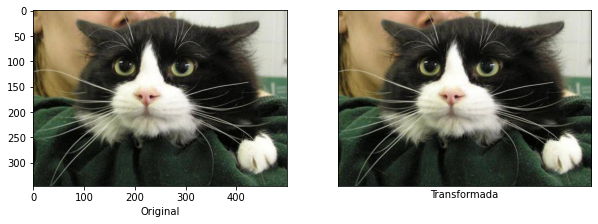

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(image[0])
plt.xlabel('Original')
plt.subplot(1,2,2)
plt.imshow(next(aug_iter)[0].astype(np.uint8))
plt.xlabel('Transformada')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

### Rotación

*   **Rotaciones aleatorias**: para que el modelo se adapte a rotaciones de las imágenes, se peuden hacer rotaciones aleatorias de las imágenes durante el entrenamiento.

Por ejemplo si hacemos rotaciones hasta un rango de 90 grados:



In [ ]:
datagen = ImageDataGenerator(rotation_range=90)
aug_iter=datagen.flow(image)

In [ ]:
def plotImages(aug_iter,sub1=2,sub2=5, size=15):
  aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(sub1*sub2)]
  fig, axes = plt.subplots(sub1, sub2, figsize=(size,size))
  axes = axes.flatten()
  for img, ax in zip(aug_images, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

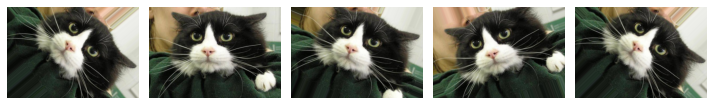

In [ ]:
plotImages(aug_iter, 1,5,10)

### Movimientos verticales y horizontales

*   **Random Shifts**: La idea es que el los objetos se desplacen de su centro con movimientos aleatorios horizaontales y verticales, a partir de los argumentos **width_shift_range** y **height_shift_range**

*width_shift_range* es un número de punto flotante entre 0.0 y 1.0 que especifica el límite superior de la fracción del ancho total por el cual la imagen se desplazará aleatoriamente, ya sea hacia la izquierda o hacia la derecha.

*height_shift_range* es también un número entre 0 y 1, pero esta vez se mueve de manera vertical.


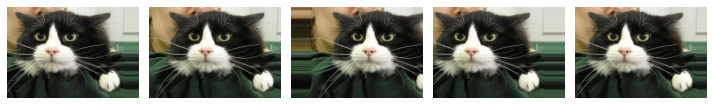

In [ ]:
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1,5,10)

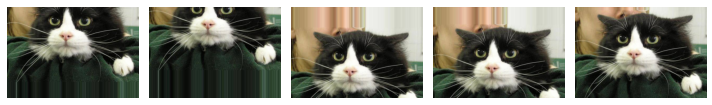

In [ ]:
shift = 0.3
datagen = ImageDataGenerator(height_shift_range=shift)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1,5,10)

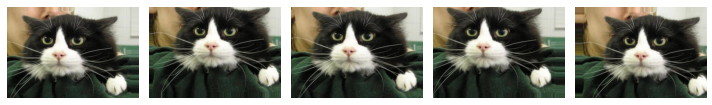

In [ ]:
shift = 0.1
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

### Giros aleatorios

*   **Random Flips**: Crea giros aleatorios de la imagen en el eje horizontal y vertical, a través de los argumentos **vertical_flip** y **horizontal_flip**



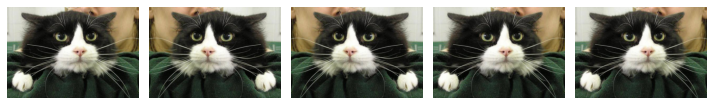

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

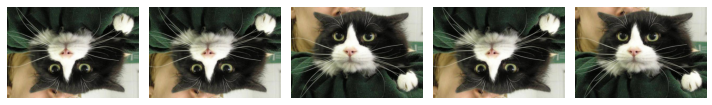

In [ ]:
datagen = ImageDataGenerator(vertical_flip=True)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

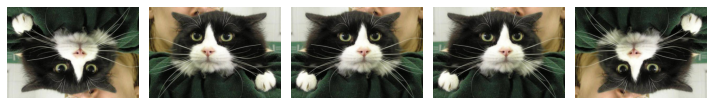

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

### Transformación de corte, transvección (Shear)

*   **Shear**: Distorsiona la imagen a partir de un ángulo determinado, para verla desde otra perspectiva. Para esto se utiliza el argumento *shear_range*





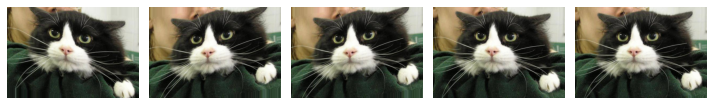

In [ ]:
datagen = ImageDataGenerator(shear_range=10)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

### Zoom

*   Zoom: Amplía la imagen de manera aleatoria. Un valor del argumento zoom_range menor que 1.0 amplía la imagen, mientras que un zoom mayor que 1.0 reduce la imagen.



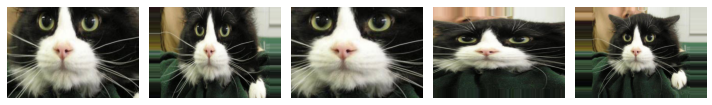

In [ ]:
datagen = ImageDataGenerator(zoom_range=[0.5, 1.5])
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

### Movimiento de canal (Channel Shift)

Mueve los valores del canal de color con el argumento **channel_shift_range**

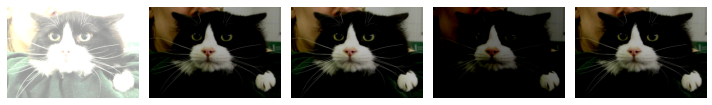

In [ ]:
datagen = ImageDataGenerator(channel_shift_range=150.0)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

### Rellenar regiones de la imagen
Con algunas de estas transformaciones se adicionan partes a la imagen distorcionada, por ejemplo en los desplazamiento, para que la imagen mantenga el tamaño habrá un pedazo distorcionado. Para esto se pude utilizar el argumento **fill_mode** con diferentes formas de rellenar:



*   *nearest*: Esta es la opción predeterminada donde se elige el valor de píxel más cercano y se repite para todos los valores vacíos
*   *reflect*: Este modo crea un "reflejo" y llena los valores vacíos en orden inverso a los valores conocidos
*   wrap: Crea un efecto de "envoltura" copiando los valores de los puntos conocidos en los puntos desconocidos, manteniendo el orden sin cambios
*   *constant*: Si queremos llenar todos los puntos que se encuentran fuera de los límites de la entrada con un valor constante, este modo nos ayuda a lograr exactamente eso. El valor constante se especifica mediante el argumento **cval**



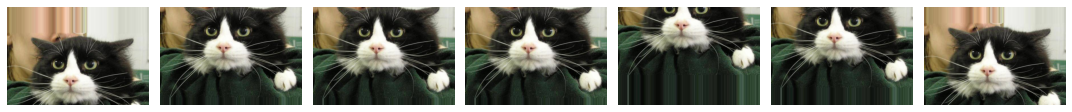

In [ ]:
shift = 0.3
datagen = ImageDataGenerator(height_shift_range=shift, fill_mode='nearest')
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 7, 15)

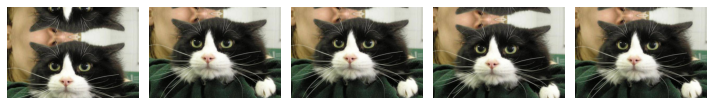

In [ ]:
shift = 0.5
datagen = ImageDataGenerator(height_shift_range=shift, fill_mode='reflect')
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

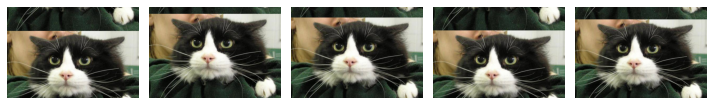

In [ ]:
shift = 0.3
datagen = ImageDataGenerator(height_shift_range=shift, fill_mode='wrap')
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

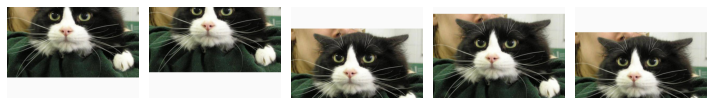

In [ ]:
shift = 0.3
datagen = ImageDataGenerator(height_shift_range=shift, fill_mode='constant', cval=250)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

Aplicando varias transformacioenes

In [ ]:
datagen = ImageDataGenerator(rotation_range=90,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.15,
                         zoom_range=0.1,
                         channel_shift_range=10.,
                         horizontal_flip=True,
                         vertical_flip=True)

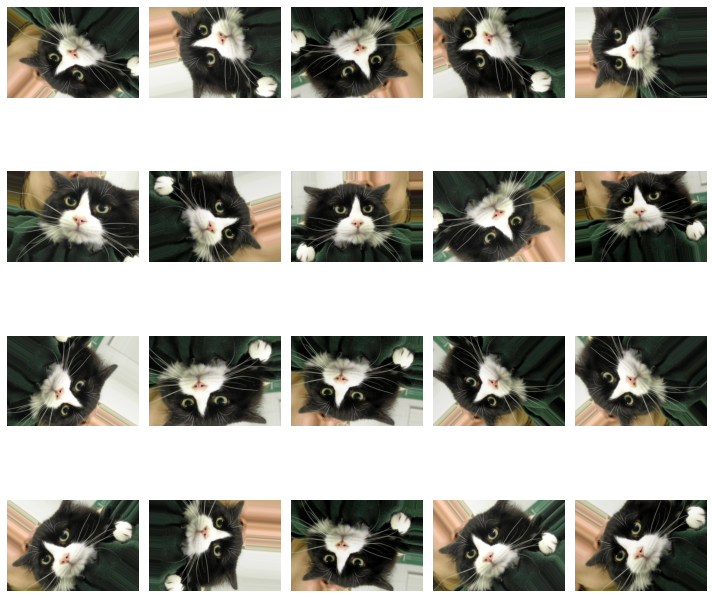

In [ ]:
aug_iter=datagen.flow(image)
plotImages(aug_iter, 4, 5, 10)

Esta clase también tiene el argumento **rescale** que permite hacer la normalización de las imágenes dividiéndolas por 255

`rescale=1./255`

## Cargar los datos con la función *flow_from_directory* de *ImageDataGenerator*

Para esto los datos deben estar separados en carpetas que tengan el nombre de las clases.

Para hacerlo con este ejemplo vamos a dividir las imágenes en carpetas diferentes. Y ya los vamos a dividir en entrenamiento y validación

In [ ]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

In [ ]:
dataset_home = '/content/data_dogs_vs_cats/'
subdirs = ['train/', 'val/']
for subdir in subdirs:
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
seed(7)
val_ratio = 0.2
src_directory = '/content/train'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'val/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0,
                              rotation_range=90,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.15,
                              zoom_range=0.1,
                              channel_shift_range=10.,
                              horizontal_flip=True,
                              vertical_flip=True)

In [ ]:
batch_size=64
train_it = datagen.flow_from_directory('/content/data_dogs_vs_cats/train', class_mode='binary',
                                       batch_size=batch_size, target_size=(224, 224))
val_it = datagen.flow_from_directory('/content/data_dogs_vs_cats/val', class_mode='binary',
                                      batch_size=batch_size, target_size=(224, 224))

Found 20018 images belonging to 2 classes.
Found 4982 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D,MaxPooling2D, Dense, Activation
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

In [ ]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=model.inputs, outputs=output)

opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
history = model.fit(train_it, steps_per_epoch=len(train_it),
                              validation_data=val_it, validation_steps=len(val_it),
                              epochs=5, verbose=1)

Epoch 1/5
313/313 [==============================] - 367s 1s/step - loss: 0.5264 - accuracy: 0.7283 - val_loss: 0.4084 - val_accuracy: 0.8228
Epoch 2/5
313/313 [==============================] - 367s 1s/step - loss: 0.4211 - accuracy: 0.8032 - val_loss: 0.4010 - val_accuracy: 0.8200
Epoch 3/5
313/313 [==============================] - 370s 1s/step - loss: 0.3988 - accuracy: 0.8177 - val_loss: 0.3441 - val_accuracy: 0.8519
Epoch 4/5
313/313 [==============================] - 371s 1s/step - loss: 0.3811 - accuracy: 0.8284 - val_loss: 0.3336 - val_accuracy: 0.8573
Epoch 5/5
313/313 [==============================] - 369s 1s/step - loss: 0.3622 - accuracy: 0.8379 - val_loss: 0.3332 - val_accuracy: 0.8497


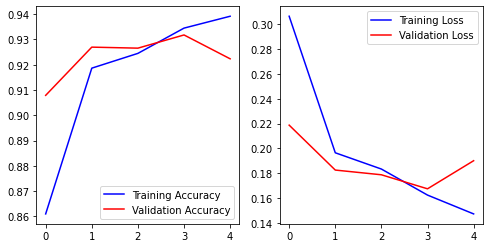

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()